In [1]:
import torch
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import fetch_california_housing #カリフォルニア

/home/vscode/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


データの準備

In [2]:
dataset = fetch_california_housing()
Y = dataset.target
X = dataset.data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

データの正規化

In [3]:
normalizer = MinMaxScaler()

In [4]:
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

tensor型に変化

In [5]:
x = torch.tensor(X_train, dtype=torch.float32)
y = torch.tensor(Y_train, dtype=torch.float32)
dataset = TensorDataset(x, y)
loader = DataLoader(dataset, batch_size=40, shuffle=True)

ニューラルネットワークの作成

In [6]:
model = nn.Sequential(
  nn.Linear(8, 10),
  nn.ReLU(),
  nn.Linear(10, 1)
)

In [7]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [8]:
mse = nn.MSELoss()

In [9]:
for i in range(10):
  for batch_x, batch_y in loader:
    optimizer.zero_grad()
    y_product = model(batch_x)
    loss = mse(y_product.view_as(batch_y), batch_y)
    loss.backward()
    optimizer.step()

In [10]:
x = torch.tensor(X_test, dtype=torch.float32)
y_product = model(x).detach().numpy()
print(mean_absolute_error(Y_test, y_product))

0.5222920448943904


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

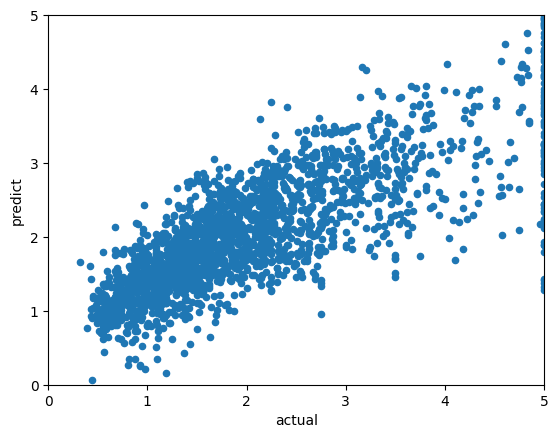

In [15]:
result = pd.DataFrame({
    "predict": np.reshape(y_product, (-1,)),
    "actual": np.reshape(Y_test, (-1,))
})
limit = np.max(Y_test)

result.plot.scatter(x="actual", y="predict", xlim=(0, limit), ylim=(0, limit))
plt.show()